In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


   day  tavg  tmin  tmax  prcp  wspd  prcpl7  Artemisia  Alnus  Betula  \
0    1  -1.0  -1.3  -0.7   0.0  15.8     0.0          0      0       0   
1    2  -1.2  -2.7  -0.6   0.0  12.5     0.0          0      0       0   
2    3  -1.7  -4.4   2.2   0.0  10.9     0.0          0      0       0   
3    5   7.0   6.4   7.8   0.5  25.3     0.0          0      0       0   
4    7   1.1  -0.6   2.3   0.0  10.8     0.0          0      0       0   

   Quercus  Chenopodium  Gramineae  Fagus  Corylus  Rumex  Plantago  
0        0            0          0      0        0      0         0  
1        0            0          0      0        0      0         0  
2        0            0          0      0        0      0         0  
3        0            0          0      0        0      0         0  
4        0            0          0      0        0      0         0  


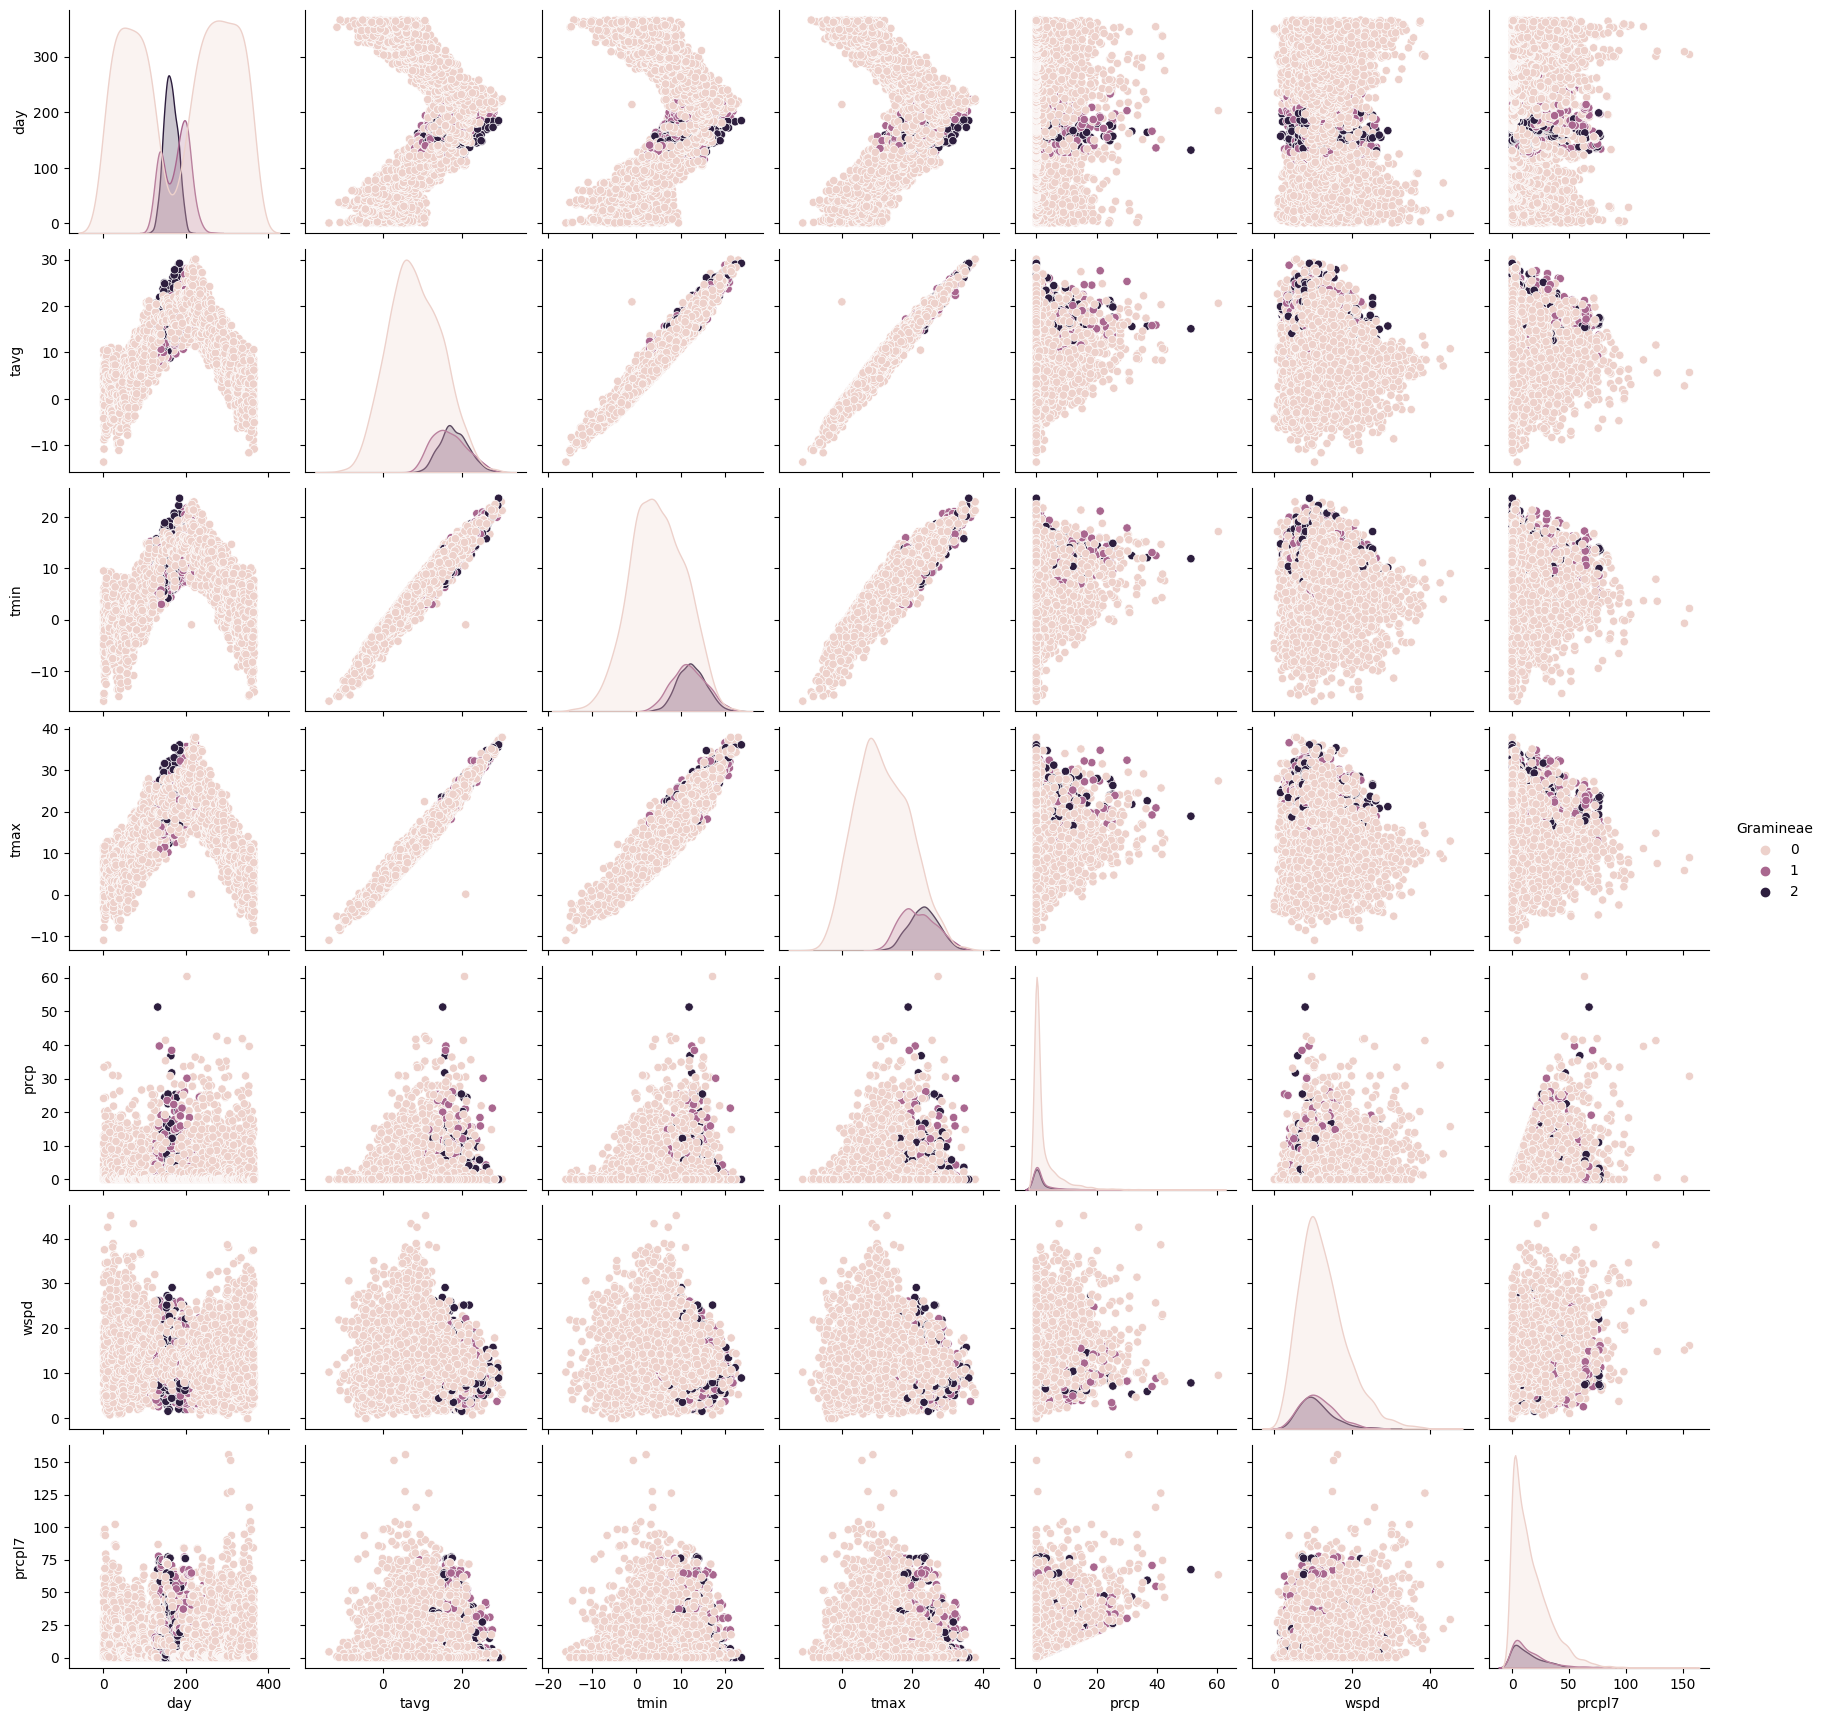

In [33]:
le = LabelEncoder()

df = pd.read_excel("../../data/PollenRelatedToWeather.xlsx")
df = df.drop(['date'], axis=1)

print(df.head())

X = df.drop(['Artemisia','Alnus','Betula','Quercus','Chenopodium','Gramineae','Fagus','Corylus','Rumex','Plantago'], axis=1)
y = df[['Artemisia','Alnus','Betula','Quercus','Chenopodium','Gramineae','Fagus','Corylus','Rumex','Plantago']]

# Visualize the data
# create a temporary DataFrame
df_temp = pd.concat([X, df['Gramineae']], axis=1)

# exclude rows where 'Fraxinus' is 0
# df_temp = df_temp[df_temp['Gramineae'] != 0]

# plot the pairplot
sns.pairplot(df_temp, hue="Gramineae")
plt.show()



In [57]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier and train it on the training data
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

# Assume X_train and y_train are your weather features and pollen indices, respectively
model = RandomForestRegressor()
model.fit(X_train, y_train)

# # Create a RandomForestClassifier and train it on the training data
# model = RandomForestClassifier(n_estimators=100)
# model.fit(X_train, y_train)


# # Visualize the decision tree
# plt.figure(figsize=(15, 7))
# tree.plot_tree(model.estimators_[0], filled=True, rounded=True, feature_names=X.columns, class_names=y.columns)
# plt.show()



# Use the trained regressor to predict the labels of the test data
y_pred = model.predict(X_test)



# Measure the mean absolute error of the regressor
mae = mean_absolute_error(y_test, y_pred)

# Measure the mean squared error of the regressor
mse = mean_squared_error(y_test, y_pred)

# Measure the R^2 score of the regressor
r2 = r2_score(y_test, y_pred)

print(f"The mean absolute error of the Random Forest Regressor is: {mae}")
print(f"The mean squared error of the Random Forest Regressor is: {mse}")
print(f"The R^2 score of the Random Forest Regressor is: {r2}")



The mean absolute error of the Random Forest Regressor is: 0.06567170762444868
The mean squared error of the Random Forest Regressor is: 0.04916424070573412
The R^2 score of the Random Forest Regressor is: 0.37735958674589104


In [59]:
new_data = [[190.00, 25.60, 13.00, 30.50, 0.90, 10.50, 1018.80]]
# new_data = [[183.00, 16.00, 7.50, 20.90, 0.10, 20.00, 1.50]]


# Assume y is your DataFrame containing target variables
target_columns = y.columns.tolist()

predictions = model.predict(new_data)

# Convert the numpy array to a list
predictions_list = predictions[0].tolist()

np.set_printoptions(suppress=True)

# Print each prediction with its corresponding column header
for col, pred in zip(target_columns, predictions_list):
    print(f"{col}: {pred}")

Artemisia: 0.02
Alnus: 0.0
Betula: 0.0
Quercus: 0.0
Chenopodium: 0.01
Gramineae: 0.71
Fagus: 0.0
Corylus: 0.0
Rumex: 0.02
Plantago: 0.03
